In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('DataFS.csv')
df.head()

,sg,al,pcc,ba,hemo,htn,dm,appet,ane,class
0,1.020,1.0,0.0,0.0,15.4,1.0,1.0,1.0,0.0,1.0
1,1.020,4.0,0.0,0.0,11.3,0.0,0.0,1.0,0.0,1.0
2,1.010,2.0,0.0,0.0,9.6,0.0,1.0,0.0,1.0,1.0
3,1.005,4.0,1.0,0.0,11.2,1.0,0.0,0.0,1.0,1.0
4,1.010,2.0,0.0,0.0,11.6,0.0,0.0,1.0,0.0,1.0


In [3]:
y=df['class']
x=df.drop(['class'],axis=1)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [5]:
#mulai perhitungan
score=[] 
algorithms=[] 

In [6]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'KNN score diferent valus')

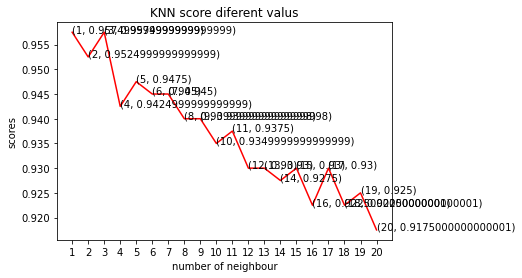

In [7]:
plt.plot([k for k in range(1,21)], knn_scores,color='red')
for i in range (1,21):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of neighbour')
plt.ylabel('scores')
plt.title('KNN score diferent valus')

In [8]:
knn_scores

[0.9574999999999999,
 0.9524999999999999,
 0.9574999999999999,
 0.9424999999999999,
 0.9475,
 0.945,
 0.945,
 0.9399999999999998,
 0.9399999999999998,
 0.9349999999999999,
 0.9375,
 0.93,
 0.93,
 0.9275,
 0.93,
 0.9225000000000001,
 0.93,
 0.9225000000000001,
 0.925,
 0.9175000000000001]

In [9]:
score1=[] 
algorithms1=[] 

In [10]:
knn_scores1 = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score1 = cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores1.append(score1.mean())

Text(0.5, 1.0, 'KNN score diferent valus')

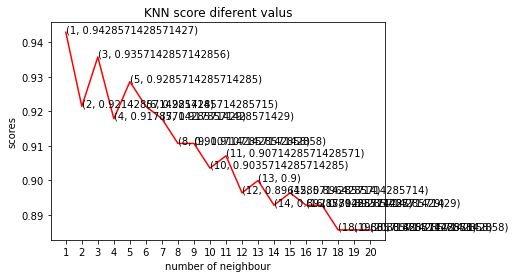

In [11]:
plt.plot([k for k in range(1,21)], knn_scores1,color='red')
for i in range (1,21):
    plt.text(i, knn_scores1[i-1], (i,knn_scores1[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of neighbour')
plt.ylabel('scores')
plt.title('KNN score diferent valus')

In [12]:
knn_scores1

[0.9428571428571427,
 0.9214285714285714,
 0.9357142857142856,
 0.9178571428571429,
 0.9285714285714285,
 0.9214285714285715,
 0.9178571428571429,
 0.9107142857142858,
 0.9107142857142858,
 0.9035714285714285,
 0.9071428571428571,
 0.8964285714285714,
 0.9,
 0.8928571428571427,
 0.8964285714285714,
 0.8928571428571429,
 0.8928571428571429,
 0.8857142857142858,
 0.8857142857142858,
 0.8857142857142858]

In [13]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean',n_jobs=-1,
                                      weights='distance')
knn.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [14]:
ypred=knn.predict(x_test)
hasil = accuracy_score(y_test,ypred)
print('acc = %.2f%%' %(hasil*100))

acc = 99.17%


In [15]:
tn, fp, fn, tp = confusion_matrix(y_test,ypred).ravel()
(tn, fp, fn, tp)

(44, 0, 1, 75)

In [16]:
confusion_matrix(y_test,ypred)

array([[44,  0],
       [ 1, 75]], dtype=int64)